In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (replace with your actual file name)
df = pd.read_csv('amazon_products.csv')

# Display the first few rows to understand the structure of the dataset
print(df.head())

# Checking for missing values
print("Missing Values: \n", df.isnull().sum())

# Basic statistics of numerical columns
print(df.describe())


         asin                                              title  \
0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/815dLQKYIY...   
1  https://m.media-amazon.com/images/I/81bQlm7vf6...   
2  https://m.media-amazon.com/images/I/71EA35zvJB...   
3  https://m.media-amazon.com/images/I/91k6NYLQyI...   
4  https://m.media-amazon.com/images/I/61NJoaZcP9...   

                             productURL  stars  reviews   price  listPrice  \
0  https://www.amazon.com/dp/B014TMV5YE    4.5        0  139.99       0.00   
1  https://www.amazon.com/dp/B07GDLCQXV    4.5        0  169.99     209.99   
2  https://www.amazo

In [2]:
# Data Cleaning
# Replace missing 'price', 'listPrice', and 'reviews' with 0 if not available
df['price'] = df['price'].fillna(0)
df['listPrice'] = df['listPrice'].fillna(0)
df['reviews'] = df['reviews'].fillna(0)

# Convert 'isBestSeller' to boolean if it's not already
df['isBestSeller'] = df['isBestSeller'].astype(bool)

# Display cleaned data
print(df.head())


         asin                                              title  \
0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/815dLQKYIY...   
1  https://m.media-amazon.com/images/I/81bQlm7vf6...   
2  https://m.media-amazon.com/images/I/71EA35zvJB...   
3  https://m.media-amazon.com/images/I/91k6NYLQyI...   
4  https://m.media-amazon.com/images/I/61NJoaZcP9...   

                             productURL  stars  reviews   price  listPrice  \
0  https://www.amazon.com/dp/B014TMV5YE    4.5        0  139.99       0.00   
1  https://www.amazon.com/dp/B07GDLCQXV    4.5        0  169.99     209.99   
2  https://www.amazo

In [3]:
# Data Insights

# Top 10 products by highest rating (excluding products with zero ratings)
top_rated_products = df[df['stars'] > 0].sort_values(by='stars', ascending=False).head(10)
print("Top 10 Rated Products: \n", top_rated_products[['title', 'stars', 'reviews', 'price']])

# Number of bestsellers
bestsellers_count = df['isBestSeller'].sum()
print(f"Number of Best Sellers: {bestsellers_count}")


Top 10 Rated Products: 
                                                      title  stars  reviews  \
346370   Bonka Bird Toys 3747 Sola Log Natural Small Bi...    5.0        0   
1331947  Cartoon Alphabet Animals Kid Backpack for Boy ...    5.0        0   
307183   Ecological Formulas Nadh 5 Mg 120 Tabs by Ecol...    5.0        3   
307185   LALAFINA Puff Baby After- Body Travel for Kids...    5.0        1   
1331932  Letter B with Flower Backpacks Bookbag Shoulde...    5.0        0   
1331934  Human Skeleton Backpacks Rock and Roll Happy G...    5.0        0   
307189   Blue Lizard Spf#50+ Baby Australian Sunscreen ...    5.0        6   
1094787  Plant Stickers - Botanical Nature Stickers Pac...    5.0        4   
307193   LNGLAT 5pcs Baby Bows Hair Clips Toddler Girls...    5.0        2   
307199   BIBS Pacifiers - Supreme Collection | BPA-Free...    5.0        1   

         price  
346370   13.99  
1331947  13.49  
307183   52.00  
307185   14.89  
1331932  31.77  
1331934  26.95

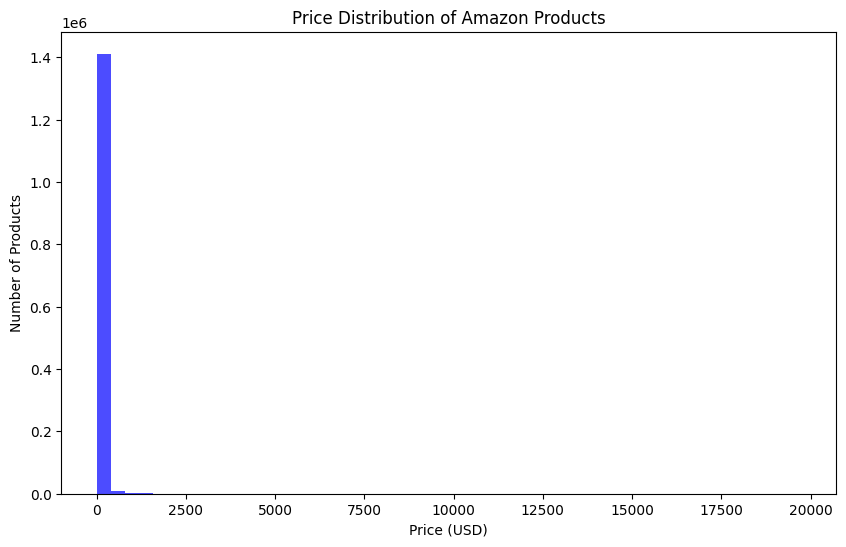

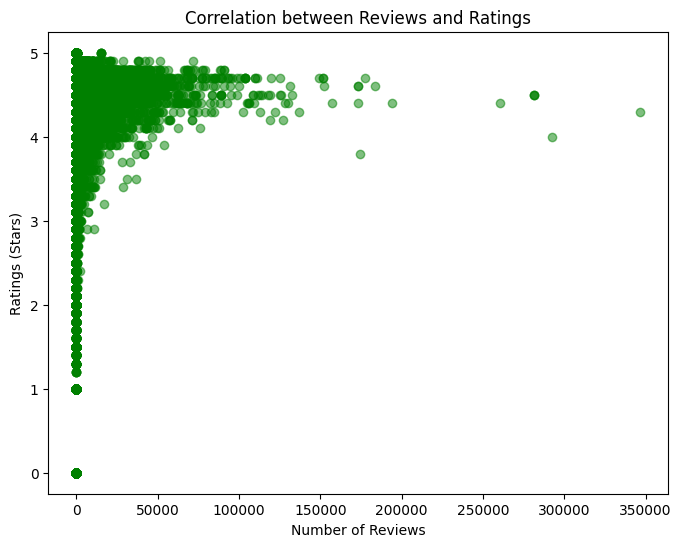

In [4]:
# Price distribution
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=50, color='blue', alpha=0.7)
plt.title('Price Distribution of Amazon Products')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products')
plt.show()

# Correlation between reviews and ratings
plt.figure(figsize=(8, 6))
plt.scatter(df['reviews'], df['stars'], alpha=0.5, color='green')
plt.title('Correlation between Reviews and Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Ratings (Stars)')
plt.show()


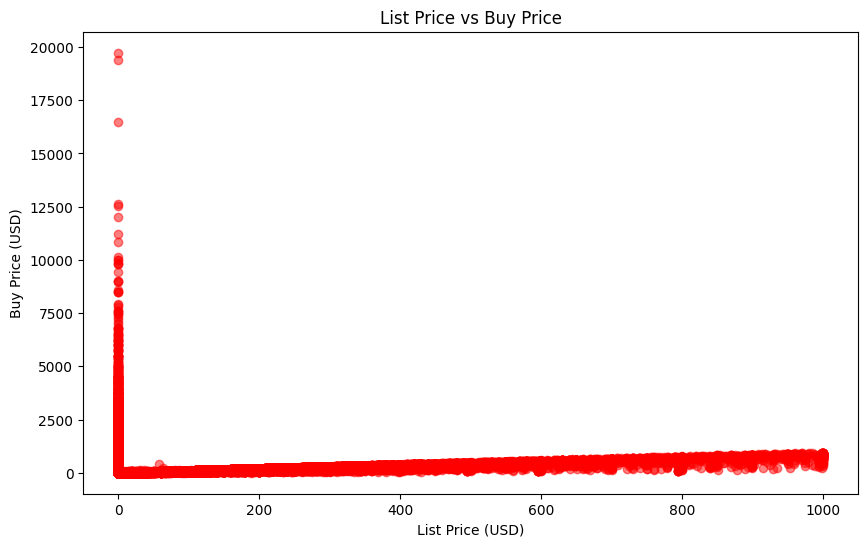

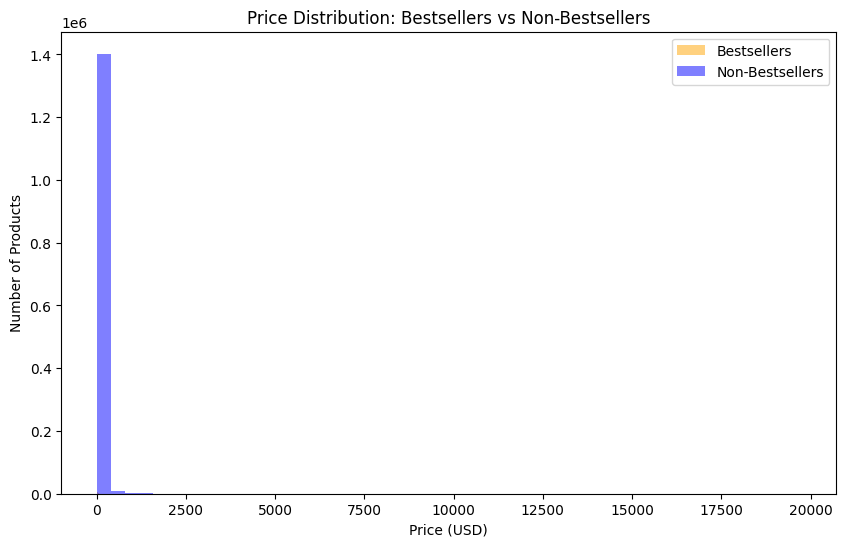

In [6]:
# Price vs. List Price Analysis
plt.figure(figsize=(10, 6))
plt.scatter(df['listPrice'], df['price'], alpha=0.5, color='red')
plt.title('List Price vs Buy Price')
plt.xlabel('List Price (USD)')
plt.ylabel('Buy Price (USD)')
plt.show()

# Bestseller vs Non-bestseller Price Comparison
bestseller_prices = df[df['isBestSeller'] == True]['price']
non_bestseller_prices = df[df['isBestSeller'] == False]['price']

plt.figure(figsize=(10, 6))
plt.hist(bestseller_prices, bins=50, alpha=0.5, label='Bestsellers', color='orange')
plt.hist(non_bestseller_prices, bins=50, alpha=0.5, label='Non-Bestsellers', color='blue')
plt.title('Price Distribution: Bestsellers vs Non-Bestsellers')
plt.xlabel('Price (USD)')
plt.ylabel('Number of Products')
plt.legend()
plt.show()


In [7]:
# Conclusion: Printing the final cleaned dataset
print("Final Cleaned Dataset: \n", df.head())

# Saving the cleaned dataset to a new CSV file
df.to_csv('cleaned_amazon_products.csv', index=False)


Final Cleaned Dataset: 
          asin                                              title  \
0  B014TMV5YE  Sion Softside Expandable Roller Luggage, Black...   
1  B07GDLCQXV  Luggage Sets Expandable PC+ABS Durable Suitcas...   
2  B07XSCCZYG  Platinum Elite Softside Expandable Checked Lug...   
3  B08MVFKGJM  Freeform Hardside Expandable with Double Spinn...   
4  B01DJLKZBA  Winfield 2 Hardside Expandable Luggage with Sp...   

                                              imgUrl  \
0  https://m.media-amazon.com/images/I/815dLQKYIY...   
1  https://m.media-amazon.com/images/I/81bQlm7vf6...   
2  https://m.media-amazon.com/images/I/71EA35zvJB...   
3  https://m.media-amazon.com/images/I/91k6NYLQyI...   
4  https://m.media-amazon.com/images/I/61NJoaZcP9...   

                             productURL  stars  reviews   price  listPrice  \
0  https://www.amazon.com/dp/B014TMV5YE    4.5        0  139.99       0.00   
1  https://www.amazon.com/dp/B07GDLCQXV    4.5        0  169.99     209.9

In [8]:
# Summary of numerical columns
print(df.describe())

# Summary of categorical columns
print(df.describe(include=['O']))


              stars       reviews         price     listPrice   category_id  \
count  1.426337e+06  1.426337e+06  1.426337e+06  1.426337e+06  1.426337e+06   
mean   3.999512e+00  1.807508e+02  4.337540e+01  1.244916e+01  1.237409e+02   
std    1.344292e+00  1.761453e+03  1.302893e+02  4.611198e+01  7.311273e+01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
25%    4.100000e+00  0.000000e+00  1.199000e+01  0.000000e+00  6.500000e+01   
50%    4.400000e+00  0.000000e+00  1.995000e+01  0.000000e+00  1.200000e+02   
75%    4.600000e+00  0.000000e+00  3.599000e+01  0.000000e+00  1.760000e+02   
max    5.000000e+00  3.465630e+05  1.973181e+04  9.999900e+02  2.700000e+02   

       boughtInLastMonth  
count       1.426337e+06  
mean        1.419823e+02  
std         8.362720e+02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         5.000000e+01  
max         1.000000e+05  
              asin          title  \
count   

In [9]:
# Check for missing values
print(df.isnull().sum())


asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64


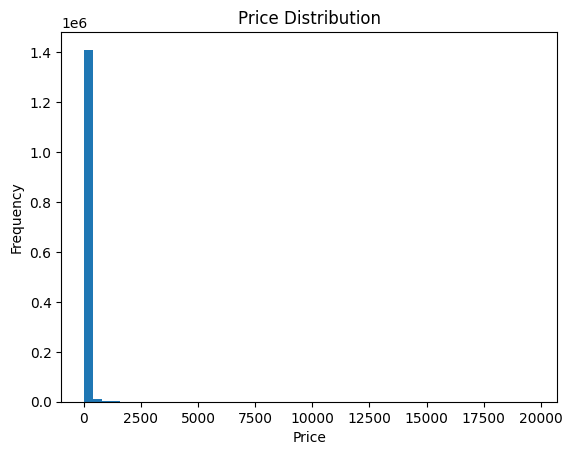

In [10]:
# Example: If the target column is 'price'
import matplotlib.pyplot as plt

plt.hist(df['price'], bins=50)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


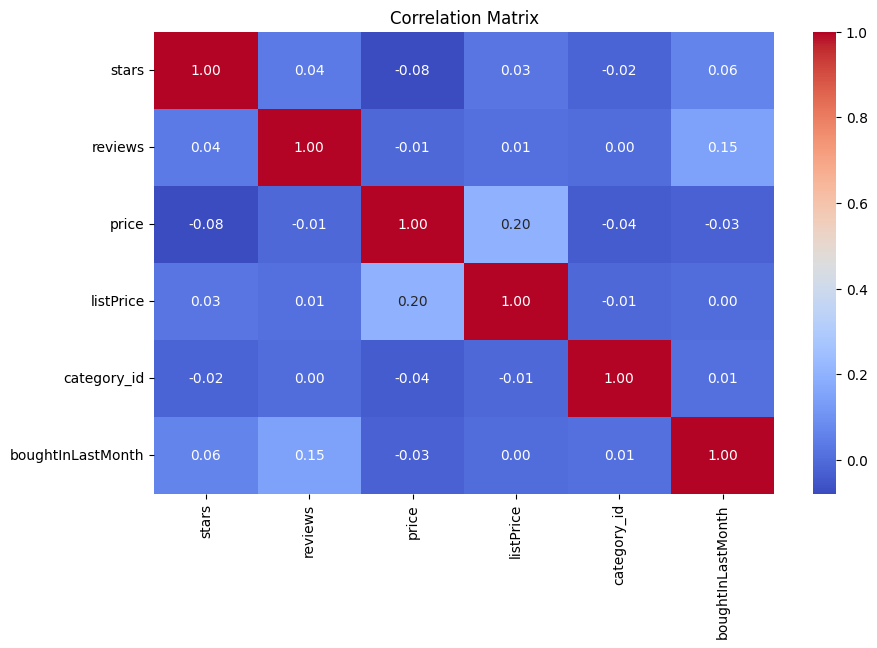

In [14]:
# Select only numeric columns
import numpy as np

numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix for numeric columns
corr = numeric_df.corr()

# Heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [18]:
print(df.columns)


Index(['asin', 'title', 'imgUrl', 'productURL', 'stars', 'reviews', 'price',
       'listPrice', 'category_id', 'isBestSeller', 'boughtInLastMonth'],
      dtype='object')


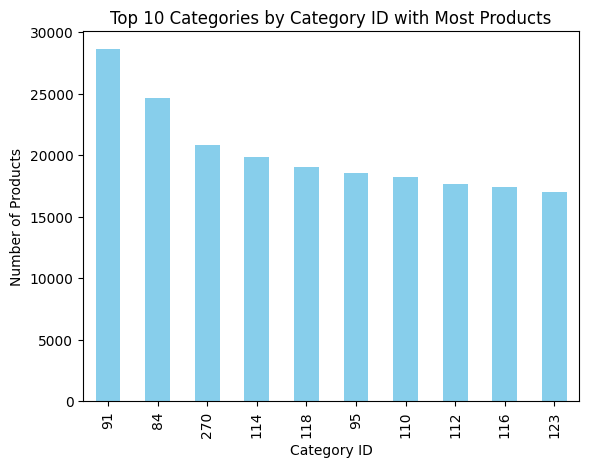

In [20]:
# Bar plot of top categories by category_id
top_categories = df['category_id'].value_counts().head(10)

# Plot the bar chart
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Category ID with Most Products')
plt.ylabel('Number of Products')
plt.xlabel('Category ID')
plt.show()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop columns that are irrelevant for prediction (e.g., 'asin', 'title', 'productURL', 'imgUrl')
df_clean = df.drop(['asin', 'title', 'productURL', 'imgUrl'], axis=1)

# Handle categorical columns if any (like 'isBestSeller')
df_clean = pd.get_dummies(df_clean, columns=['isBestSeller'], drop_first=True)

# Fill or drop any missing values
df_clean = df_clean.fillna(df_clean.mean())

# Split into features (X) and target (y) - assuming you're predicting stars
X = df_clean.drop(['stars'], axis=1)  # Features
y = df_clean['stars']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the BPNN model
model = Sequential()

# Input layer (number of features in X_train_scaled)
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))

# Hidden layer 1
model.add(Dense(64, activation='relu'))

# Hidden layer 2 (you can add more layers as needed)
model.add(Dense(32, activation='relu'))

# Output layer - for regression use 'linear' activation, for classification use 'softmax' or 'sigmoid'
model.add(Dense(1, activation='linear'))  # Assuming regression (predicting star ratings)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])  # MSE for regression

# Model summary
model.summary()


C:\Users\devan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,265 (44.00 KB)

 Trainable params: 11,265 (44.00 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20
28527/28527 ━━━━━━━━━━━━━━━━━━━━ 26s 913us/step - loss: 1.6183 - mae: 0.7983 - val_loss: 1.5899 - val_mae: 0.7823
Epoch 2/20
28527/28527 ━━━━━━━━━━━━━━━━━━━━ 27s 952us/step - loss: 1.6070 - mae: 0.7944 - val_loss: 1.6028 - val_mae: 0.7889
Epoch 3/20
28527/28527 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 1.6084 - mae: 0.7955 - val_loss: 1.5824 - val_mae: 0.8144
Epoch 4/20
28527/28527 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 1.5994 - mae: 0.7923 - val_loss: 1.5707 - val_mae: 0.7870
Epoch 5/20
28527/28527 ━━━━━━━━━━━━━━━━━━━━ 32s 1ms/step - loss: 1.5958 - mae: 0.7916 - val_loss: 1.5700 - val_mae: 0.7950
Epoch 6/20
28527/28527 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 1.5880 - mae: 0.7885 - val_loss: 1.5668 - val_mae: 0.7837
Epoch 7/20
28527/28527 ━━━━━━━━━━━━━━━━━━━━ 28s 979us/step - loss: 1.5837 - mae: 0.7870 - val_loss: 1.5556 - val_mae: 0.7766
Epoch 8/20
28527/28527 ━━━━━━━━━━━━━━━━━━━━ 27s 944us/step - loss: 1.5799 - mae: 0.7860 - val_loss: 1.5781 - val_mae: 0.8063
Epoch 9/

In [26]:
# Evaluate on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test MAE: {test_mae}')


8915/8915 ━━━━━━━━━━━━━━━━━━━━ 6s 679us/step - loss: 1.5685 - mae: 0.7603
Test Loss: 1.5671793222427368
Test MAE: 0.7604739665985107


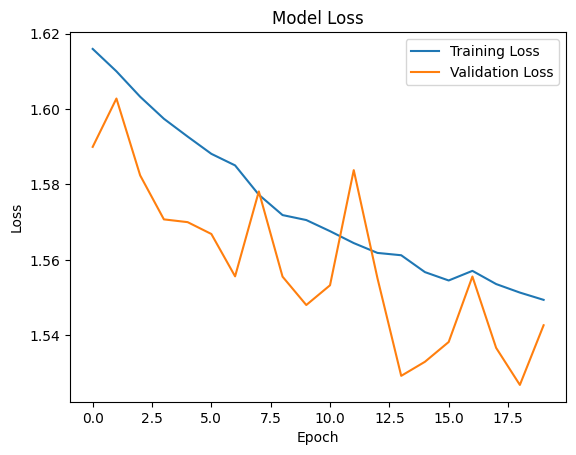

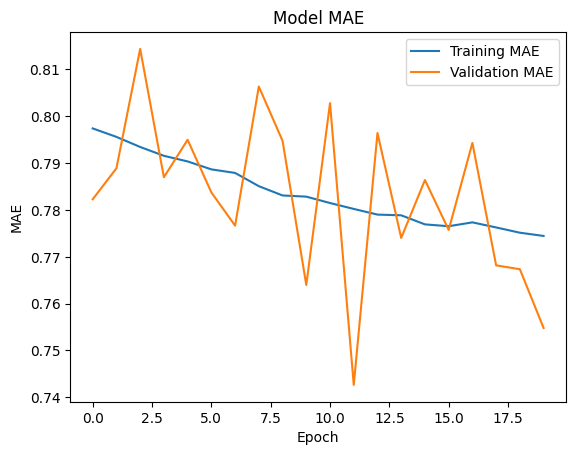

In [27]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [28]:
# Make predictions on the test set
predictions = model.predict(X_test_scaled)

# Optionally: Inverse transform predictions if necessary
# predictions = scaler.inverse_transform(predictions)

# Display first few predictions vs actual values
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f}, Actual: {y_test.iloc[i]:.2f}")


8915/8915 ━━━━━━━━━━━━━━━━━━━━ 6s 713us/step
Predicted: 3.07, Actual: 4.50
Predicted: 3.82, Actual: 4.60
Predicted: 4.41, Actual: 4.40
Predicted: 4.45, Actual: 4.60
Predicted: 2.87, Actual: 4.50


In [29]:
# Save model to disk
model.save('bpnn_model.h5')

# Load the model
from tensorflow.keras.models import load_model
model = load_model('bpnn_model.h5')
